In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# PERCEPTRON

In [2]:
class Perceptron:

    '''
        @param eta: learning rate
        @param n_iter: total epochs
        @param random_state = seed for random weight generation
    '''
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    ''' 
        @param X: training data
        @param y: target values for training
    '''
    def fit(self,X,y):
        
        rgen = np.random.RandomState(self.random_state)

        #Weights after fitting, X.shape[1] gives us the number of features
        #We init with small random numbers to start
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=X.shape[1]) 
        
        self.b_ = np.float_(0.) #Bias after fitting
        self.errors_ = [] #Number of miscalculations for each epoch

        for _ in range(self.n_iter):
            errors = 0
            for xi,target in zip(X,y):
                update = self.eta * (target-self.predict(xi))

                self.w_ += update * xi
                self.b_ += update

                errors += int(update != 0.0)

            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,0)

In [3]:
''' Load Iris Data Set '''
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,encoding='utf-8')

y = data.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',0,1)
X = data.iloc[0:100,[0,2]].values

''' Fit data to Perceptron'''
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)

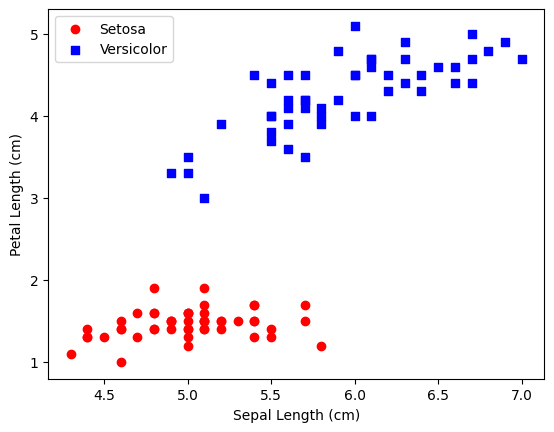

In [4]:
''' View Data Set '''
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='s',label='Versicolor')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')  
plt.legend(loc='upper left')
plt.show()

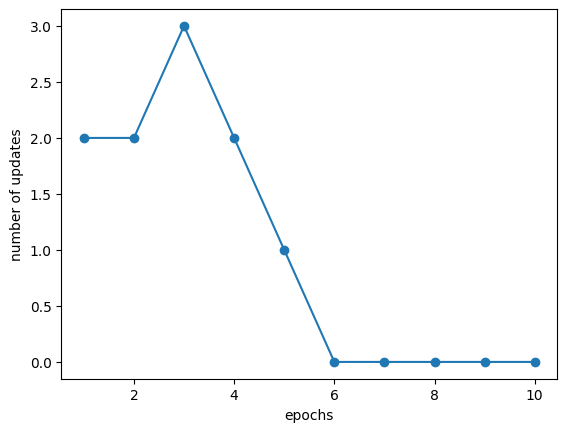

In [5]:
''' Error rate by Epoch '''
plt.plot(range(1,len(ppn.errors_) + 1),ppn.errors_,marker='o')
plt.xlabel('epochs')
plt.ylabel('number of updates'  )
plt.show()

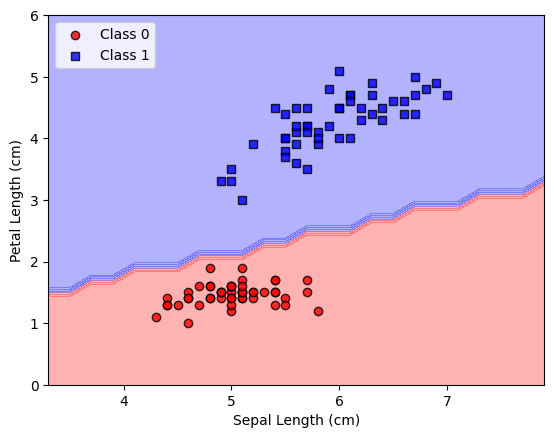

In [6]:
''' View decision regions for classifier '''
def plot_decision_regions(X,y,classifier,resolution=.2):

    markers= ('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))

    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):

        plt.scatter(
            x=X[y==cl,0],
            y=X[y==cl,1],
            alpha=.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black'
        )

plot_decision_regions(X,y,ppn)  
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')  
plt.legend(loc='upper left')
plt.show()

# ADALINE (Adaptive Neural Neuron)

## GRADIENT DESCENT

In [ ]:
class AdalineGD:

    '''
        @param eta: learning rate
        @param n_iter: total epochs
        @param random_state = seed for random weight generation
    '''
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    ''' 
        @param X: training data
        @param y: target values for training
    '''
    def fit(self,X,y):
        
        rgen = np.random.RandomState(self.random_state)

        #Weights after fitting, X.shape[1] gives us the number of features
        #We init with small random numbers to start
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=X.shape[1]) 
        
        self.b_ = np.float_(0.) #Bias after fitting
        self.losses_ = [] #Number of miscalculations for each epoch

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)

            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()

            self.losses_.append(loss)

        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_
    
    def activation(self,X):
        return X # Linear Activation
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= .5 , 1, 0)
    
    

In [ ]:
''' Creating two Adalines with varing learning rates to demonstrate tuning of hyperparameters'''
ada1 = AdalineGD(n_iter=15,eta=0.1).fit(X,y)
ada2 = AdalineGD(n_iter=15,eta=0.0001).fit(X,y)

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

''' Configure Plot for Ada1'''
ax[0].plot(range(1,len(ada1.losses_)+1),
           np.log10(ada1.losses_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log(Mean Squared Error)')
ax[0].set_title('Adaline - Learning Rate 0.1')

''' Configure Plot for Ada2 '''
ax[1].plot(range(1,len(ada2.losses_)+1),
           np.log10(ada2.losses_),marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Adaline - Learning Rate 0.0001')

print('Left Figure : Shows the overshooting over the Global Loss Minimum due to a learning rate that is much too large.')
print('Right Figure: Shows a learning rate that is too small, this would need many epochs to reach the Global Loss Minimum.')

plt.show()

In [ ]:
''' Gradient Descent Optimization Via Standardization '''

#Standardization of X
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

#Training Adaline model with a standardized X
ada_gd = AdalineGD(n_iter=20,eta=0.5)
ada_gd.fit(X_std,y)

In [ ]:
''' Plotting Decision Regions for Adaline with standardization '''
plot_decision_regions(X_std,y,classifier=ada_gd)
plt.title("Adaline - Gradient Descent")
plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
''' Plot declining loss using standardization '''
plt.plot(range(1,len(ada_gd.losses_)+1),
         ada_gd.losses_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

## STOCHASTIC GRADIENT DESCENT

In [ ]:
class AdalineSGD:

    '''
        @param eta: learning rate
        @param n_iter: total epochs
        @param random_state = seed for random weight generation
    '''
    def __init__(self,eta=0.01,n_iter=50,shuffle=True,random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def _initialize_weights(self,m):
        ''' Initialize weights with random small numbers '''
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0,scale=0.01,size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _shuffle(self,X,y):
        r = self.rgen.permutation(len(y))
        return X[r],y[r]
    
    def _update_weights(self,xi,target):
        output = self.activation(self.net_input(xi))
        error = (target-output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    ''' 
        @param X: training data
        @param y: target values for training
    '''
    def fit(self,X,y):
        
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)

            losses = []
            for xi,target in zip(X,y):
                losses.append(self._update_weights(xi,target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)

        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_
    
    def activation(self,X):
        return X # Linear Activation
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= .5 , 1, 0)
    
    ''' Allows us to update our model on the fly as new data is added '''
    def partial_fit(self,X,y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi,target in zip(X,y):
                self._update_weights(xi,target)

        else:
            self._update_weights(X,y)
        
        return self

In [ ]:
''' Train our Adaline model using Stochastic Gradient Descent '''
ada_sgd = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada_sgd.fit(X_std,y)

In [ ]:
''' Plotting Decision Regions for Adaline with standardization '''
plot_decision_regions(X_std,y,classifier=ada_sgd)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel('Sepal Length [standardized]')
plt.ylabel('Petal Length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
''' Plot declining loss using standardization '''
plt.plot(range(1,len(ada_sgd.losses_)+1),
         ada_sgd.losses_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.tight_layout()
plt.show()